In [ ]:
# If running in Google Colab, uncomment the following lines to install necessary packages
#!pip install warp-lang==1.7.0
#!pip install --upgrade git+https://github.com/psheehan/pinball-warp.git

In [1]:
from pinballrt.sources import Star
from pinballrt.grids import UniformCartesianGrid
from pinballrt.model import Model

import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np

In [2]:
star = Star()
star.set_blackbody_spectrum()

In [3]:
model = Model(grid=UniformCartesianGrid, grid_kwargs={"ncells":9, "dx":2.0*u.au})

density = np.ones(model.grid.shape)*1.0e-16 * u.g / u.cm**3

model.add_density(density, "yso.dst")
model.add_star(star)

Warp CUDA error: Could not open libcuda.so.
Warp CUDA error: Function cuDriverGetVersion_f: a suitable driver entry point was not found
Warp CUDA error 36 (in function cuda_driver_version, /builds/omniverse/warp/warp/native/warp.cu:1719)


Warp 1.7.0 initialized:
   CUDA Toolkit 12.8, Driver 0.0 (insufficient CUDA driver version!)
   Devices:
     "cpu"      : "x86_64"
   Kernel cache:
     /home/codespace/.cache/warp/1.7.0
Warp UserWarning: 
   Insufficient CUDA driver version.
   The minimum required CUDA driver version is 12.0, but the installed CUDA driver version is 0.0.
   Visit https://github.com/NVIDIA/warp/blob/main/README.md#installing for guidance.


/opt/conda/envs/warp/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: overflow encountered in expm1
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/conda/envs/warp/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: overflow encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/conda/envs/warp/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: overflow encountered in expm1
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/conda/envs/warp/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: overflow encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [4]:
model.thermal_mc(nphotons=1000000, device="cpu")

Iteration 0
Module pinballrt.sources f5dedf3 load on device 'cpu' took 429.74 ms  (cached)
Module pinballrt.grids c31ad99 load on device 'cpu' took 10963.46 ms  (compiled)
Module pinballrt.utils 08b2efb load on device 'cpu' took 93.11 ms  (cached)


100%|██████████| 1000000/1000000 [00:05<00:00, 193382.96it/s]


0
Iteration 1


100%|██████████| 1000000/1000000 [00:44<00:00, 22717.21it/s]


1
Iteration 2


100%|██████████| 1000000/1000000 [00:43<00:00, 23126.34it/s]


2 1.1618974 235.4313
Iteration 3


100%|██████████| 1000000/1000000 [00:43<00:00, 22877.42it/s]

3 1.1753631 1.0115894


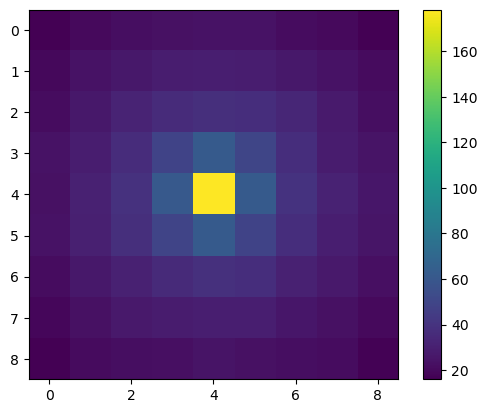

In [5]:
plt.imshow(model.grid_list["cpu"][0].grid.temperature.numpy()[:,:,4])
plt.colorbar()
plt.show()

In [1]:
image = model.make_image(npix=256, pixel_size=0.1*u.arcsec, lam=np.array([1., 1000.])*u.micron, incl=45., pa=45., distance=1.*u.pc, device='cpu')

NameError: name 'model' is not defined

In [ ]:
plt.imshow(image.intensity[:,:,0], origin="lower", interpolation="none")
plt.show()